In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from Class.Helper import Helper as Helper
helper = Helper()

In [2]:
helper.loadBestResults()

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,F-Score Average,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
8,Gauss functions,Breast Cancer Data,7,Train,BruteForce Threshold,0.912088,0.903602,0.901639,0.933333,0.964912,0.823529,0.932203,0.875000,285,170,0.492363,5,0.4928987057062042,40.698781,2019-05-10 13:41:32.329336
5,Gauss functions,Breast Cancer Wisconsin,5,Train,BruteForce Threshold,0.891941,0.886925,0.983660,0.775000,0.847887,0.973822,0.910741,0.863109,355,191,0.494971,5,0.4949822149488666,70.331434,2019-05-11 00:25:40.640322
8,Gauss functions,Data Banknote Authentication,7,Train,BruteForce Threshold,0.983592,0.983409,0.975709,0.990050,0.987705,0.980296,0.981670,0.985149,488,609,0.495190,5,0.4949641037993124,47.567721,2019-05-10 14:08:09.962803
11,Gauss functions,Haberman,9,Train,BruteForce Threshold,0.782787,0.682783,0.642857,0.811881,0.415385,0.916201,0.504673,0.860892,65,179,0.000000,5,0.535882150571749,4.025025,2019-05-10 17:38:13.555344
5,Gauss functions,Heart,5,Train,BruteForce Threshold,0.917355,0.915485,0.883562,0.968750,0.977273,0.845455,0.928058,0.902913,132,110,0.495117,5,0.4949825341715368,74.348253,2019-05-10 20:02:17.522728
2,Gauss functions,HTRU,3,Train,BruteForce Threshold,0.966476,0.898755,0.820355,0.981031,0.811594,0.982087,0.815951,0.981558,1311,13007,0.671201,5,0.6711866731353724,1304.134312,2019-05-10 18:52:47.825700
11,Gauss functions,Immunotherapy,9,Train,BruteForce Threshold,0.875000,0.749129,0.863636,1.000000,1.000000,0.400000,0.926829,0.571429,57,15,0.000000,5,0.5369050940506724,0.929053,2019-05-10 14:09:49.229481
2,Gauss functions,Indian Liver Patient,3,Train,BruteForce Threshold,0.738197,0.498978,0.731868,1.000000,1.000000,0.082707,0.845178,0.152778,333,133,0.500000,5,0.4915860624590265,23.294332,2019-05-11 13:03:42.483956
14,Gauss functions,Pima Indians,11,Train,BruteForce Threshold,0.891374,0.875094,0.903226,0.864583,0.937799,0.798077,0.920188,0.830000,209,104,0.000000,5,0.5380365559294832,45.278995,2019-05-10 02:15:15.890301


In [2]:
stats_df = helper.loadFuzzificationStats()

,Dataset,Gausses,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct
0,Breast Cancer Data,3,569 (357/212),455 (285/170),114 (72/42),203,0.45,31,5,5
1,Breast Cancer Data,5,569 (357/212),455 (285/170),114 (72/42),123,0.27,87,5,5
2,Breast Cancer Data,7,569 (357/212),455 (285/170),114 (72/42),70,0.15,183,5,5
3,Breast Cancer Data,9,569 (357/212),455 (285/170),114 (72/42),24,0.05,276,5,5
4,Breast Cancer Data,11,569 (357/212),455 (285/170),114 (72/42),10,0.02,345,5,5
5,Breast Cancer Wisconsin,3,683 (444/239),546 (355/191),137 (89/48),240,0.44,126,9,9
6,Breast Cancer Wisconsin,5,683 (444/239),546 (355/191),137 (89/48),0,0.00,268,9,9
7,Breast Cancer Wisconsin,7,683 (444/239),546 (355/191),137 (89/48),0,0.00,295,9,9
8,Breast Cancer Wisconsin,9,683 (444/239),546 (355/191),137 (89/48),0,0.00,356,9,9
9,Breast Cancer Wisconsin,11,683 (444/239),546 (355/191),137 (89/48),0,0.00,354,9,9


In [8]:
stats_df = helper.loadFuzzificationStats()

,Dataset,Gausses,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct
0,Breast Cancer Data,3,569 (357/212),455 (285/170),114 (72/42),184,40.0,38,5,5
1,Breast Cancer Data,5,569 (357/212),455 (285/170),114 (72/42),124,27.0,92,5,5
2,Breast Cancer Data,7,569 (357/212),455 (285/170),114 (72/42),42,9.0,183,5,5
3,Breast Cancer Wisconsin,3,683 (444/239),546 (355/191),137 (89/48),0,0.0,209,9,9
4,Breast Cancer Wisconsin,5,683 (444/239),546 (355/191),137 (89/48),0,0.0,318,9,9
5,Breast Cancer Wisconsin,7,683 (444/239),546 (355/191),137 (89/48),0,0.0,344,9,9
6,Data Banknote Authentication,3,1372 (610/762),1097 (488/609),275 (122/153),370,34.0,19,4,4
7,Data Banknote Authentication,5,1372 (610/762),1097 (488/609),275 (122/153),141,13.0,74,4,4
8,Data Banknote Authentication,7,1372 (610/762),1097 (488/609),275 (122/153),15,1.0,142,4,4
9,Haberman,3,306 (81/225),244 (65/179),62 (16/46),63,26.0,26,3,3


In [4]:
parameters_df = helper.loadFuzzificationParameters()

,Dataset,Gausses,Auto Mode,Mean 0,Std 0,Mean 1,Std 1,Mean 2,Std 2,Mean 3,...,Mean 11,Std 11,Mean 12,Std 12,Mean 13,Std 13,Mean 14,Std 14,Mean 15,Std 15
0,Breast Cancer Data,11,True,0.337,0.167,0.32,0.147,0.332,0.169,0.216,...,,,,,,,,,,
1,Breast Cancer Data,3,True,0.34,0.169,0.325,0.146,0.335,0.171,0.219,...,,,,,,,,,,
2,Breast Cancer Data,5,True,0.337,0.166,0.326,0.142,0.332,0.168,0.216,...,,,,,,,,,,
3,Breast Cancer Data,7,True,0.337,0.168,0.327,0.147,0.332,0.169,0.217,...,,,,,,,,,,
4,Breast Cancer Data,9,True,0.337,0.168,0.33,0.143,0.332,0.169,0.216,...,,,,,,,,,,
5,Breast Cancer Wisconsin,11,True,0.387,0.314,0.232,0.336,0.243,0.33,0.202,...,,,,,,,,,,
6,Breast Cancer Wisconsin,3,True,0.384,0.311,0.24,0.339,0.247,0.331,0.205,...,,,,,,,,,,
7,Breast Cancer Wisconsin,5,True,0.388,0.309,0.247,0.346,0.252,0.335,0.208,...,,,,,,,,,,
8,Breast Cancer Wisconsin,7,True,0.385,0.318,0.241,0.343,0.242,0.329,0.205,...,,,,,,,,,,
9,Breast Cancer Wisconsin,9,True,0.382,0.31,0.239,0.345,0.249,0.339,0.204,...,,,,,,,,,,


In [5]:
dataset_stats_breast = helper.loadDatasetResults("Breast Cancer Data")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Breast Cancer Data,3,Train,No Optymalization,0.226374,0,0.265464,0,0.605882,0,0.369176,285,170,0.5,5,---,1.31102,2019-05-10 13:22:14.983568
1,Gauss functions,Breast Cancer Data,3,Train,BruteForce S-Functions,0.626374,0.626374,0,1,0,0.77027,0,285,170,0,5,---,66.3863,2019-05-10 13:23:26.677954
2,Gauss functions,Breast Cancer Data,3,Train,BruteForce Threshold,0.373626,0,0.373626,0,1,0,0.544,285,170,0,5,0.5641999999999998,53.3838,2019-05-10 13:24:20.369771
3,Gauss functions,Breast Cancer Data,5,Train,No Optymalization,0.617582,0.982609,0.494118,0.396491,0.988235,0.565,0.658824,285,170,0.5,5,---,2.69574,2019-05-10 01:26:55.535845
4,Gauss functions,Breast Cancer Data,5,Train,BruteForce S-Functions,0.868132,0.878788,0.848101,0.915789,0.788235,0.896907,0.817073,285,170,0.478477,5,---,121.476,2019-05-10 01:29:05.683653
5,Gauss functions,Breast Cancer Data,5,Train,BruteForce Threshold,0.865934,0.856688,0.886525,0.94386,0.735294,0.898164,0.803859,285,170,0.478477,5,0.472952373067272,31.1775,2019-05-10 01:29:37.417160
6,Gauss functions,Breast Cancer Data,7,Train,No Optymalization,0.551648,1,0.454545,0.284211,1,0.442623,0.625,285,170,0.5,5,---,6.23491,2019-05-10 13:35:00.925695
7,Gauss functions,Breast Cancer Data,7,Train,BruteForce S-Functions,0.914286,0.901961,0.939597,0.968421,0.823529,0.93401,0.877743,285,170,0.492363,5,---,318.713,2019-05-10 13:40:51.376546
8,Gauss functions,Breast Cancer Data,7,Train,BruteForce Threshold,0.912088,0.901639,0.933333,0.964912,0.823529,0.932203,0.875,285,170,0.492363,5,0.4928987057062042,40.6988,2019-05-10 13:41:32.329336
9,Gauss functions,Breast Cancer Data,9,Train,No Optymalization,0.503297,1,0.429293,0.207018,1,0.343023,0.600707,285,170,0.5,5,---,6.57938,2019-05-10 13:49:25.242473


In [6]:
dataset_stats_wisconsin = helper.loadDatasetResults("Breast Cancer Wisconsin")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Breast Cancer Wisconsin,3,Train,No Optymalization,0.56044,1,0.443155,0.323944,1,0.489362,0.614148,355,191,0.5,5,---,10.003,2019-05-10 22:53:34.950684
1,Gauss functions,Breast Cancer Wisconsin,3,Train,BruteForce S-Functions,0.56044,1,0.443155,0.323944,1,0.489362,0.614148,355,191,0.5,5,---,554.051,2019-05-10 23:03:20.819244
2,Gauss functions,Breast Cancer Wisconsin,3,Train,BruteForce Threshold,0.650183,0.650183,0,1,0,0.788013,0,355,191,0.5,5,0.8027850118815487,56.1497,2019-05-10 23:04:17.410491
3,Gauss functions,Breast Cancer Wisconsin,5,Train,No Optymalization,0.761905,0.731959,1,1,0.319372,0.845238,0.484127,355,191,0.5,5,---,64.6321,2019-05-10 23:31:53.544886
4,Gauss functions,Breast Cancer Wisconsin,5,Train,BruteForce S-Functions,0.891941,0.98366,0.775,0.847887,0.973822,0.910741,0.863109,355,191,0.494971,5,---,2960.7,2019-05-11 00:24:29.508891
5,Gauss functions,Breast Cancer Wisconsin,5,Train,BruteForce Threshold,0.891941,0.98366,0.775,0.847887,0.973822,0.910741,0.863109,355,191,0.494971,5,0.4949822149488666,70.3314,2019-05-11 00:25:40.640322
6,Gauss functions,Breast Cancer Wisconsin,7,Train,No Optymalization,0.723443,0.701581,1,1,0.209424,0.824623,0.34632,355,191,0.5,5,---,83.5132,2019-05-11 00:46:45.786652
7,Gauss functions,Breast Cancer Wisconsin,7,Train,BruteForce S-Functions,0.769231,0.738046,1,1,0.340314,0.849282,0.507812,355,191,0.49502,5,---,3012.9,2019-05-11 01:39:56.825667
8,Gauss functions,Breast Cancer Wisconsin,7,Train,BruteForce Threshold,0.769231,0.738046,1,1,0.340314,0.849282,0.507812,355,191,0.49502,5,0.4950210931792442,66.583,2019-05-11 01:41:03.697651
9,Gauss functions,Breast Cancer Wisconsin,9,Train,No Optymalization,0.697802,0.682692,1,1,0.136126,0.811429,0.239631,355,191,0.5,5,---,56.4002,2019-05-11 13:10:20.311711


In [7]:
dataset_stats_banknote = helper.loadDatasetResults("Data Banknote Authentication")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Data Banknote Authentication,3,Train,No Optymalization,0.663628,1,0.622699,0.243852,1,0.392092,0.767486,488,609,0.5,5,---,3.24864,2019-05-10 13:25:39.022638
1,Gauss functions,Data Banknote Authentication,3,Train,BruteForce S-Functions,0.680948,1,0.635036,0.282787,1,0.440895,0.776786,488,609,0.478125,5,---,132.489,2019-05-10 13:27:57.701008
2,Gauss functions,Data Banknote Authentication,3,Train,BruteForce Threshold,0.680948,0.979167,0.635887,0.288934,0.995074,0.446203,0.775928,488,609,0.478125,5,0.4734858290655073,57.3223,2019-05-10 13:46:50.571626
3,Gauss functions,Data Banknote Authentication,5,Train,No Optymalization,0.817685,1,0.752781,0.590164,1,0.742268,0.858956,488,609,0.5,5,---,2.85316,2019-05-10 13:49:29.947742
4,Gauss functions,Data Banknote Authentication,5,Train,BruteForce S-Functions,0.896992,0.923251,0.879205,0.838115,0.944171,0.878625,0.91053,488,609,0.475313,5,---,157.167,2019-05-10 13:52:16.033242
5,Gauss functions,Data Banknote Authentication,5,Train,BruteForce Threshold,0.896992,0.923251,0.879205,0.838115,0.944171,0.878625,0.91053,488,609,0.475313,5,0.475351861319902,61.7745,2019-05-10 13:53:17.973784
6,Gauss functions,Data Banknote Authentication,7,Train,No Optymalization,0.899727,0.997368,0.847978,0.776639,0.998358,0.873272,0.917044,488,609,0.5,5,---,5.48231,2019-05-10 14:02:33.071534
7,Gauss functions,Data Banknote Authentication,7,Train,BruteForce S-Functions,0.98268,0.98152,0.983607,0.979508,0.985222,0.980513,0.984413,488,609,0.49519,5,---,270.119,2019-05-10 14:07:22.218072
8,Gauss functions,Data Banknote Authentication,7,Train,BruteForce Threshold,0.983592,0.975709,0.99005,0.987705,0.980296,0.98167,0.985149,488,609,0.49519,5,0.4949641037993124,47.5677,2019-05-10 14:08:09.962803
9,Gauss functions,Data Banknote Authentication,9,Train,No Optymalization,0.703737,1,0.652034,0.334016,1,0.500768,0.789371,488,609,0.5,5,---,11.6477,2019-05-10 14:09:43.887175


In [8]:
dataset_stats_haberman = helper.loadDatasetResults("Haberman")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Haberman,3,Train,No Optymalization,0.688525,0,0.72103,0,0.938547,0,0.815534,65,179,0.5,5,---,0.533999,2019-05-10 17:33:48.995321
1,Gauss functions,Haberman,3,Train,BruteForce S-Functions,0.733607,0,0.733607,0,1,0,0.846336,65,179,0,5,---,13.1225,2019-05-10 17:34:03.820782
2,Gauss functions,Haberman,3,Train,BruteForce Threshold,0.733607,0,0.733607,0,1,0,0.846336,65,179,0,5,0.46737779163032334,3.31299,2019-05-10 17:34:07.360781
3,Gauss functions,Haberman,5,Train,No Optymalization,0.729508,0.470588,0.748899,0.123077,0.949721,0.195122,0.837438,65,179,0.5,5,---,0.685001,2019-05-10 17:34:44.348781
4,Gauss functions,Haberman,5,Train,BruteForce S-Functions,0.733607,0,0.733607,0,1,0,0.846336,65,179,0,5,---,22.6596,2019-05-10 17:35:09.792341
5,Gauss functions,Haberman,5,Train,BruteForce Threshold,0.758197,0.636364,0.77027,0.215385,0.955307,0.321839,0.852868,65,179,0,5,0.5305485916949153,3.611,2019-05-10 17:35:13.636341
6,Gauss functions,Haberman,7,Train,No Optymalization,0.254098,0.257261,0,0.953846,0,0.405229,0,65,179,0.5,5,---,1.163,2019-05-10 17:35:33.152916
7,Gauss functions,Haberman,7,Train,BruteForce S-Functions,0.733607,0,0.733607,0,1,0,0.846336,65,179,0,5,---,36.8387,2019-05-10 17:36:16.511581
8,Gauss functions,Haberman,7,Train,BruteForce Threshold,0.733607,0.5,0.735537,0.0153846,0.994413,0.0298507,0.845606,65,179,0,5,0.49351757305964267,4.286,2019-05-10 17:36:20.976580
9,Gauss functions,Haberman,9,Train,No Optymalization,0.307377,0.254717,0.65625,0.830769,0.117318,0.389892,0.199052,65,179,0.5,5,---,2.20053,2019-05-10 17:36:50.775102


In [9]:
dataset_stats_heart = helper.loadDatasetResults("Heart")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Heart,3,Train,No Optymalization,0.231405,0.337349,0,0.424242,0,0.375839,0,132,110,0.5,5,---,8.05146,2019-05-10 18:29:38.532772
1,Gauss functions,Heart,3,Train,BruteForce S-Functions,0.545455,0.545455,0,1,0,0.705882,0,132,110,0.75,5,---,412.045,2019-05-10 18:36:59.542997
2,Gauss functions,Heart,3,Train,BruteForce Threshold,0.541322,0.543568,0,0.992424,0,0.702413,0,132,110,0.75,5,0.6660860967631345,17.14,2019-05-10 18:37:16.766982
3,Gauss functions,Heart,5,Train,No Optymalization,0.735537,0.673469,1,1,0.418182,0.804878,0.589744,132,110,0.5,5,---,69.403,2019-05-10 19:08:46.102045
4,Gauss functions,Heart,5,Train,BruteForce S-Functions,0.896694,0.840764,1,1,0.772727,0.913495,0.871795,132,110,0.495117,5,---,2930.44,2019-05-10 20:01:03.092471
5,Gauss functions,Heart,5,Train,BruteForce Threshold,0.917355,0.883562,0.96875,0.977273,0.845455,0.928058,0.902913,132,110,0.495117,5,0.4949825341715368,74.3483,2019-05-10 20:02:17.522728
6,Gauss functions,Heart,7,Train,No Optymalization,0.549587,0.547718,1,1,0.00909091,0.707775,0.018018,132,110,0.5,5,---,36.2361,2019-05-10 20:09:03.832968
7,Gauss functions,Heart,7,Train,BruteForce S-Functions,0.731405,0.670051,1,1,0.409091,0.802432,0.580645,132,110,0.49502,5,---,1912.7,2019-05-10 20:42:49.994858
8,Gauss functions,Heart,7,Train,BruteForce Threshold,0.731405,0.670051,1,1,0.409091,0.802432,0.580645,132,110,0.49502,5,0.4950416894278227,38.0992,2019-05-10 20:43:28.172041
9,Gauss functions,Heart,9,Train,No Optymalization,0.549587,0.547718,1,1,0.00909091,0.707775,0.018018,132,110,0.5,5,---,20.1504,2019-05-11 00:41:15.677522


In [10]:
dataset_stats_htru = helper.loadDatasetResults("HTRU")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,HTRU,3,Train,No Optymalization,0.917167,1,0.916438,0.0953471,1,0.174095,0.956397,1311,13007,0.5,5,---,165.117,2019-05-10 13:36:20.757934
1,Gauss functions,HTRU,3,Train,BruteForce S-Functions,0.966476,0.820355,0.981031,0.811594,0.982087,0.815951,0.981558,1311,13007,0.671201,5,---,7051.99,2019-05-10 18:31:00.910391
2,Gauss functions,HTRU,3,Train,BruteForce Threshold,0.966476,0.820355,0.981031,0.811594,0.982087,0.815951,0.981558,1311,13007,0.671201,5,0.6711866731353724,1304.13,2019-05-10 18:52:47.825700
3,Gauss functions,HTRU,5,Train,No Optymalization,0.94252,0.98996,0.94081,0.376049,0.999616,0.545053,0.969322,1311,13007,0.5,5,---,754.026,2019-05-10 14:08:23.401572
4,Gauss functions,HTRU,5,Train,BruteForce S-Functions,0.95593,0.980226,0.954666,0.529367,0.998924,0.687469,0.976293,1311,13007,0.49502,5,---,31739.8,2019-05-10 23:19:30.306328
5,Gauss functions,HTRU,5,Train,BruteForce Threshold,0.95593,0.980226,0.954666,0.529367,0.998924,0.687469,0.976293,1311,13007,0.49502,5,0.4950267985698135,836.543,2019-05-10 23:33:28.254873
6,Gauss functions,HTRU,7,Train,No Optymalization,0.908437,0,0.908437,0,1,0,0.952022,1311,13007,0.5,5,---,602.148,2019-05-11 01:02:30.012295
7,Gauss functions,HTRU,3,Test,No Optymalization,0.921508,0.960784,0.920941,0.14939,0.999385,0.258575,0.958561,328,3252,0.5,5,---,36.623,2019-05-14 13:56:06.279587
8,Gauss functions,HTRU,3,Test,Value S-Functions,0.964804,0.823718,0.978274,0.783537,0.983087,0.803125,0.980675,328,3252,0.671201,5,---,35.7804,2019-05-14 13:56:42.119957
9,Gauss functions,HTRU,3,Test,Value Threshold,0.964804,0.823718,0.978274,0.783537,0.983087,0.803125,0.980675,328,3252,0.671201,5,0.6711866731353724,37.0824,2019-05-14 13:57:47.250169


In [9]:
dataset_stats_immunotherapy = helper.loadDatasetResults("Immunotherapy")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Immunotherapy,3,Train,No Optymalization,0.111111,0,0.123077,0,0.533333,0,0.2,57,15,0.5,5,---,0.330019,2019-05-10 13:59:17.276335
1,Gauss functions,Immunotherapy,3,Train,BruteForce S-Functions,0.791667,0.791667,0,1,0,0.883721,0,57,15,0,5,---,10.2706,2019-05-10 13:59:28.903
2,Gauss functions,Immunotherapy,3,Train,BruteForce Threshold,0.791667,0.791667,0,1,0,0.883721,0,57,15,0,5,0.0031666666666666666,6.77539,2019-05-10 13:59:35.722390
3,Gauss functions,Immunotherapy,5,Train,No Optymalization,0.527778,0.96,0.297872,0.421053,0.933333,0.585366,0.451613,57,15,0.5,5,---,1.65909,2019-05-10 13:59:58.124672
4,Gauss functions,Immunotherapy,5,Train,BruteForce S-Functions,0.791667,0.791667,0,1,0,0.883721,0,57,15,0,5,---,48.6278,2019-05-10 14:00:52.835801
5,Gauss functions,Immunotherapy,5,Train,BruteForce Threshold,0.847222,0.870968,0.7,0.947368,0.466667,0.907563,0.56,57,15,0,5,0.527970287714354,1.92311,2019-05-10 14:00:54.800913
6,Gauss functions,Immunotherapy,7,Train,No Optymalization,0.305556,1,0.230769,0.122807,1,0.21875,0.375,57,15,0.5,5,---,1.7561,2019-05-10 14:07:19.826936
7,Gauss functions,Immunotherapy,7,Train,BruteForce S-Functions,0.791667,0.791667,0,1,0,0.883721,0,57,15,0,5,---,49.5238,2019-05-10 14:08:14.797080
8,Gauss functions,Immunotherapy,7,Train,BruteForce Threshold,0.805556,0.811594,0.666667,0.982456,0.133333,0.888889,0.222222,57,15,0,5,0.5308614704651577,1.62409,2019-05-10 14:08:16.460175
9,Gauss functions,Immunotherapy,9,Train,No Optymalization,0.333333,1,0.238095,0.157895,1,0.272727,0.384615,57,15,0.5,5,---,0.642037,2019-05-10 14:09:23.225994


In [12]:
dataset_stats_liver = helper.loadDatasetResults("Indian Liver Patient")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Indian Liver Patient,3,Train,No Optymalization,0.738197,0.731868,1,1,0.0827068,0.845178,0.152778,333,133,0.5,5,---,4.45225,2019-05-11 12:59:53.951885
1,Gauss functions,Indian Liver Patient,3,Train,BruteForce S-Functions,0.738197,0.731868,1,1,0.0827068,0.845178,0.152778,333,133,0.5,5,---,192.137,2019-05-11 13:03:19.083618
2,Gauss functions,Indian Liver Patient,3,Train,BruteForce Threshold,0.738197,0.731868,1,1,0.0827068,0.845178,0.152778,333,133,0.5,5,0.4915860624590265,23.2943,2019-05-11 13:03:42.483956
3,Gauss functions,Indian Liver Patient,5,Train,No Optymalization,0.684549,0.705752,0,0.957958,0,0.812739,0,333,133,0.5,5,---,46.1805,2019-05-11 00:11:09.316970
4,Gauss functions,Indian Liver Patient,5,Train,BruteForce S-Functions,0.714592,0.714592,0,1,0,0.833542,0,333,133,0.55,5,---,2578.04,2019-05-11 00:56:36.280651
5,Gauss functions,Indian Liver Patient,5,Train,BruteForce Threshold,0.714592,0.714592,0,1,0,0.833542,0,333,133,0.55,5,0.5477769089273802,45.785,2019-05-11 00:57:22.303650
6,Gauss functions,Indian Liver Patient,7,Train,No Optymalization,0.291845,1,0.287257,0.00900901,1,0.0178571,0.446309,333,133,0.5,5,---,53.158,2019-05-11 13:14:48.996079
7,Gauss functions,Indian Liver Patient,7,Train,BruteForce S-Functions,0.714592,0.714592,0,1,0,0.833542,0,333,133,0,5,---,1570.42,2019-05-11 13:44:13.351994
8,Gauss functions,Indian Liver Patient,7,Train,BruteForce Threshold,0.714592,0.714592,0,1,0,0.833542,0,333,133,0,5,0.5056364021116982,55.9222,2019-05-11 13:45:09.371198
9,Gauss functions,Indian Liver Patient,9,Train,No Optymalization,0.7103,0.713362,0,0.993994,0,0.830615,0,333,133,0.5,5,---,98.496,2019-05-10 22:55:34.998833


In [13]:
dataset_stats_pima = helper.loadDatasetResults("Pima Indians")

,Test type,Dataset,Gausses,Data Type,Operation,Accuracy,Precision A,Precision B,Recall A,Recall B,F-Score A,F-Score B,Support A,Support B,S-Functions Center,S-Functions Width,Threshold,Time (s),Test date
0,Gauss functions,Pima Indians,3,Train,No Optymalization,0.600639,1,0.454148,0.401914,1,0.573379,0.624625,209,104,0.5,5,---,7.66549,2019-05-10 13:22:51.476060
1,Gauss functions,Pima Indians,3,Train,BruteForce S-Functions,0.709265,0.883117,0.540881,0.650718,0.826923,0.749311,0.653992,209,104,0.447188,5,---,233.95,2019-05-10 13:27:06.593464
2,Gauss functions,Pima Indians,3,Train,BruteForce Threshold,0.709265,0.75431,0.580247,0.837321,0.451923,0.793651,0.508108,209,104,0.447188,5,0.3738058825531039,30.4443,2019-05-10 13:27:37.330803
3,Gauss functions,Pima Indians,5,Train,No Optymalization,0.488818,0.980392,0.39313,0.239234,0.990385,0.384615,0.562842,209,104,0.5,5,---,35.9381,2019-05-10 13:51:24.795311
4,Gauss functions,Pima Indians,5,Train,BruteForce S-Functions,0.667732,0.667732,0,1,0,0.800766,0,209,104,0,5,---,897.545,2019-05-10 14:08:22.463518
5,Gauss functions,Pima Indians,5,Train,BruteForce Threshold,0.795527,0.939394,0.635135,0.741627,0.903846,0.828877,0.746032,209,104,0,5,0.5343583778577894,28.0606,2019-05-10 14:08:50.581127
6,Gauss functions,Pima Indians,7,Train,No Optymalization,0.325879,0,0.327974,0,0.980769,0,0.491566,209,104,0.5,5,---,35.31,2019-05-10 14:11:30.221257
7,Gauss functions,Pima Indians,7,Train,BruteForce S-Functions,0.667732,0.667732,0,1,0,0.800766,0,209,104,0,5,---,895.712,2019-05-10 14:28:10.183452
8,Gauss functions,Pima Indians,7,Train,BruteForce Threshold,0.667732,0.667732,0,1,0,0.800766,0,209,104,0,5,0.49462876867408156,29.8377,2019-05-10 14:52:18.127270
9,Gauss functions,Pima Indians,9,Train,No Optymalization,0.667732,0.667732,0,1,0,0.800766,0,209,104,0.5,5,---,39.822,2019-05-10 16:59:45.099587


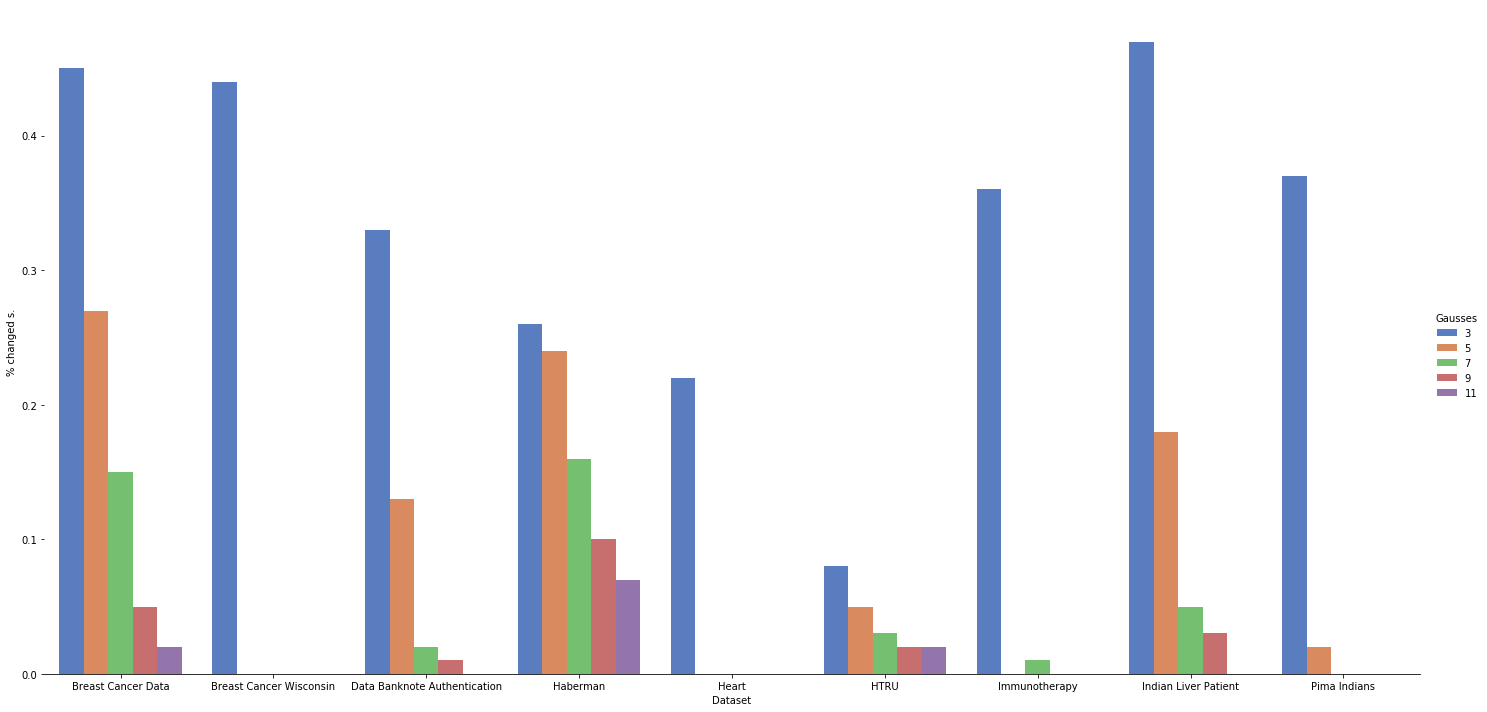

In [14]:
g = sns.catplot(x="Dataset", y="% changed s.", hue="Gausses", data=stats_df, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)


,Dataset,Gausses,Samples,Train s.,Test s.,Changed s.,% changed s.,Implicants,Features,F. after reduct,Samples Number
0,Breast Cancer Data,3,569 (357/212),455 (285/170),114 (72/42),203,0.45,31,5,5,569
1,Breast Cancer Data,5,569 (357/212),455 (285/170),114 (72/42),123,0.27,87,5,5,569
2,Breast Cancer Data,7,569 (357/212),455 (285/170),114 (72/42),70,0.15,183,5,5,569
3,Breast Cancer Data,9,569 (357/212),455 (285/170),114 (72/42),24,0.05,276,5,5,569
4,Breast Cancer Data,11,569 (357/212),455 (285/170),114 (72/42),10,0.02,345,5,5,569
5,Breast Cancer Wisconsin,3,683 (444/239),546 (355/191),137 (89/48),240,0.44,126,9,9,683
6,Breast Cancer Wisconsin,5,683 (444/239),546 (355/191),137 (89/48),0,0.00,268,9,9,683
7,Breast Cancer Wisconsin,7,683 (444/239),546 (355/191),137 (89/48),0,0.00,295,9,9,683
8,Breast Cancer Wisconsin,9,683 (444/239),546 (355/191),137 (89/48),0,0.00,356,9,9,683
9,Breast Cancer Wisconsin,11,683 (444/239),546 (355/191),137 (89/48),0,0.00,354,9,9,683


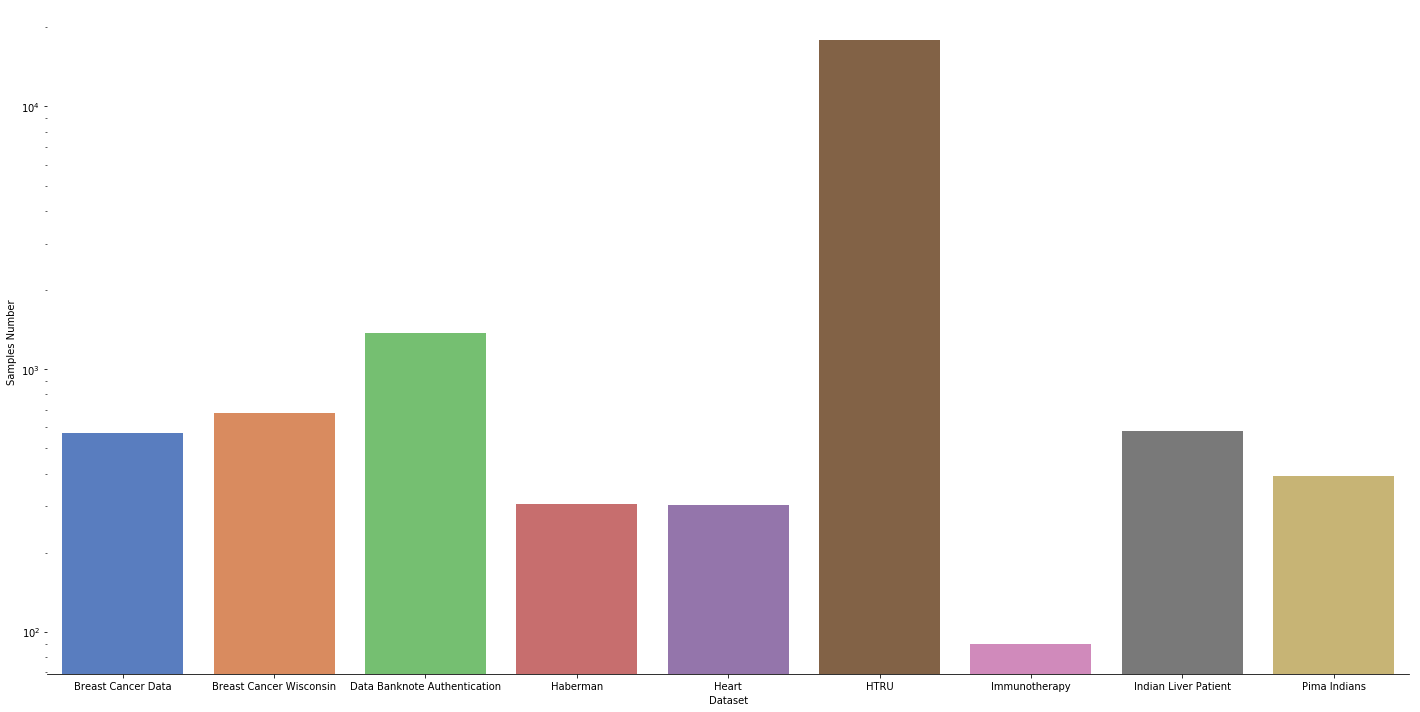

In [15]:
stats_df["Samples Number"] = stats_df["Samples"].apply(lambda x: int(x.split("(")[0]))
display(stats_df)
g = sns.catplot(x="Dataset", y="Samples Number", data=stats_df, kind="bar", palette="muted", height=10, aspect=2)
g.set_ylabels("Samples Number")
g.set(yscale ='log')
g.despine(left=True)


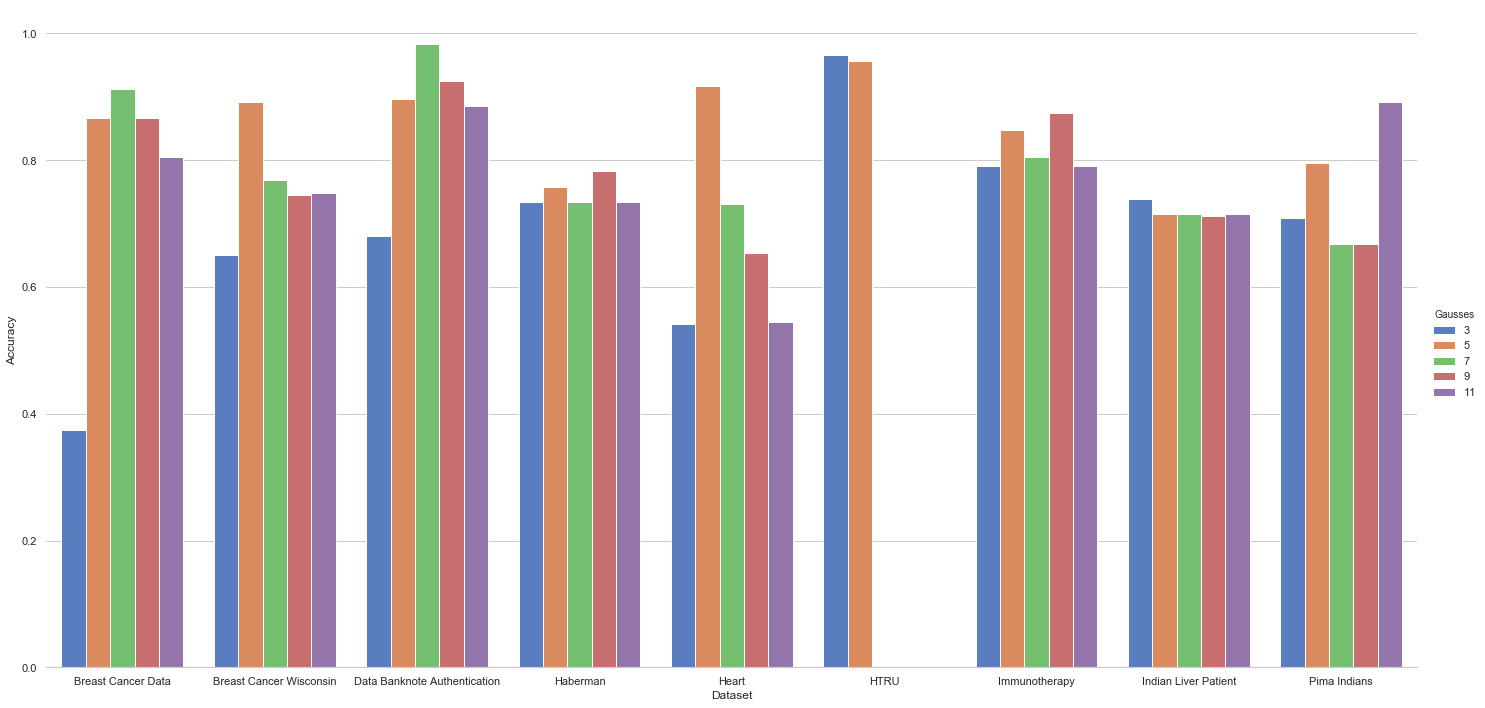

In [16]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Operation == "BruteForce Threshold")]
# !pip install -U seaborn

sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


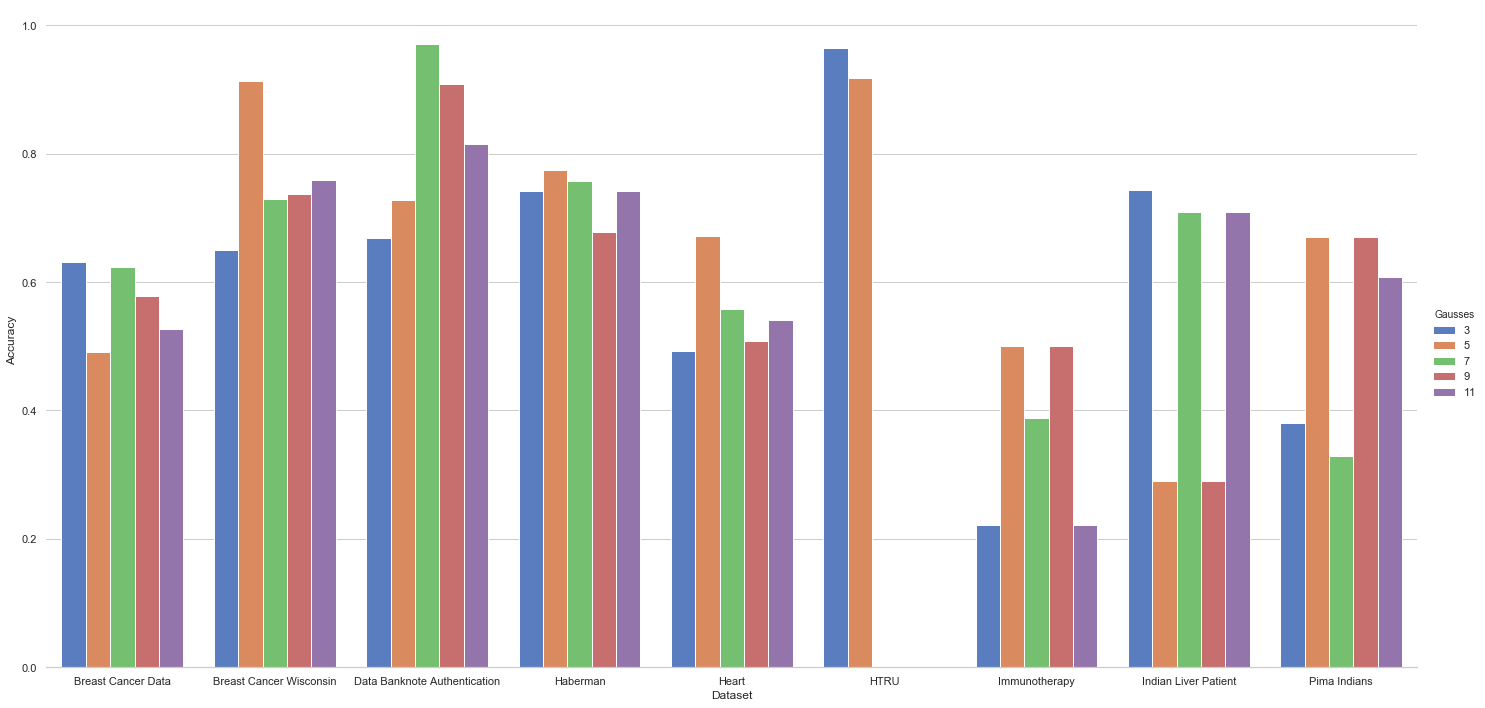

In [17]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])
gausses_result = results.loc[(results["Operation"] == "Value Threshold") & (results["Data Type"] == "Test")]

# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


C:\Programy\Anaconda\envs\py35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


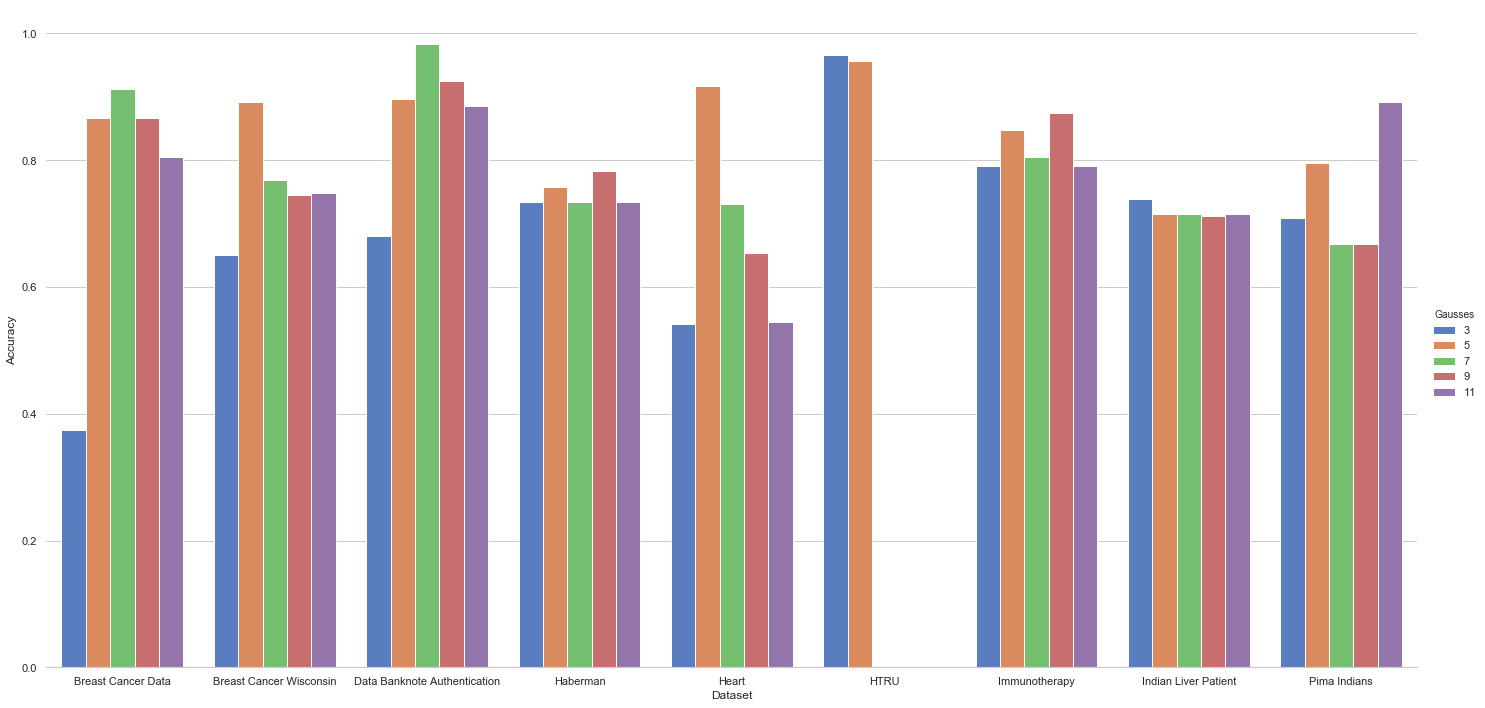

In [18]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Operation == "BruteForce Threshold")]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="Accuracy", hue="Gausses", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


C:\Programy\Anaconda\envs\py35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


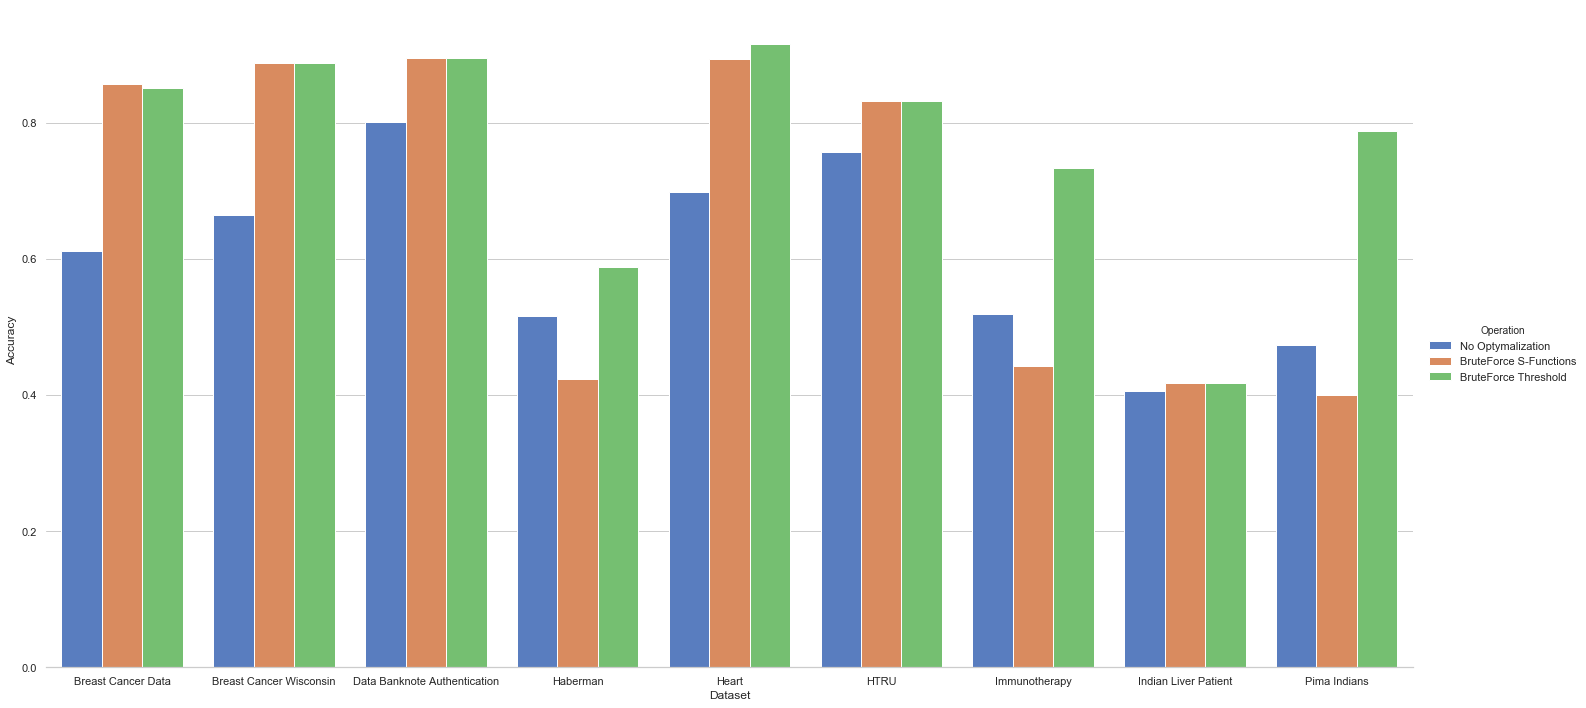

In [19]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Gausses == 5) & (results["Data Type"] == "Train")]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="F-Score Average", hue="Operation", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


C:\Programy\Anaconda\envs\py35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


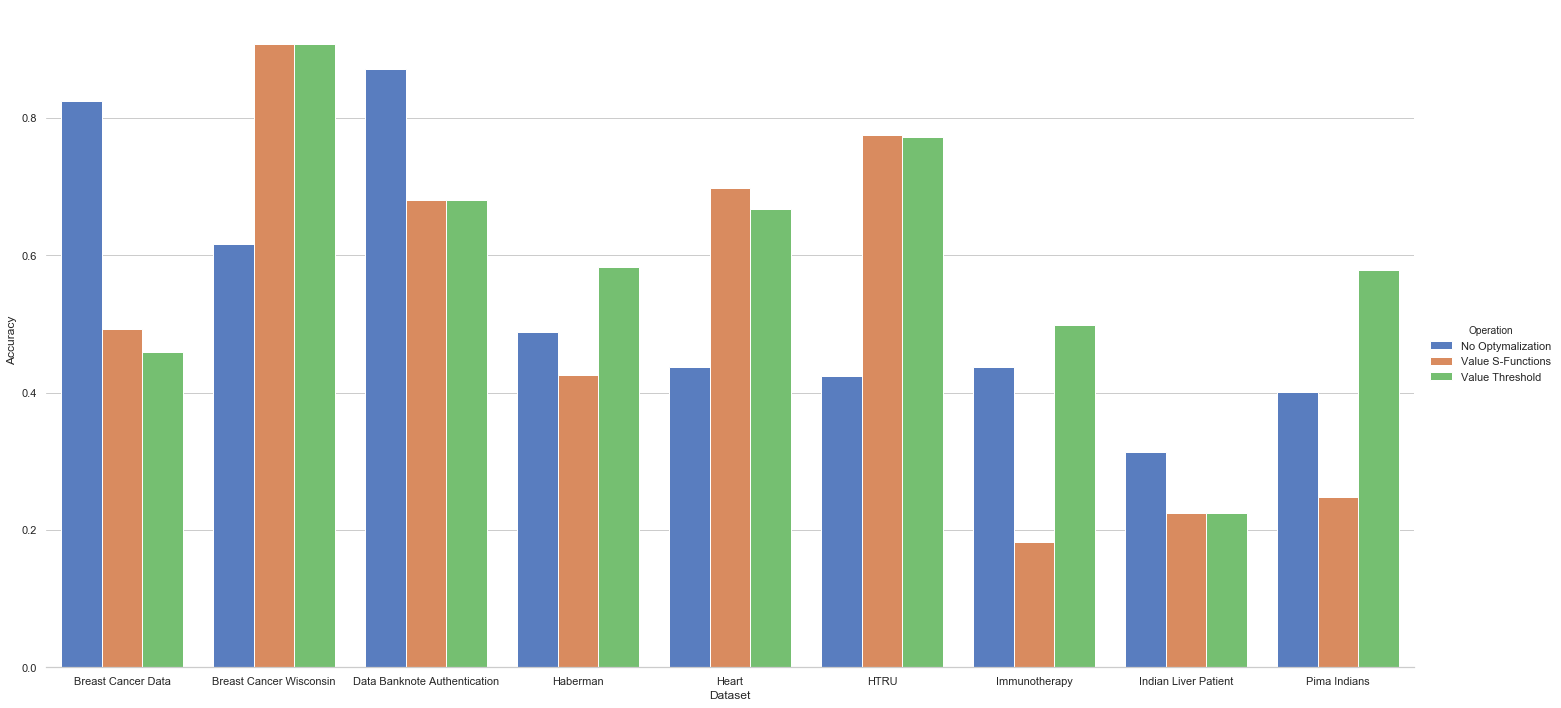

In [20]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Gausses == 5) & (results["Data Type"] == "Test")]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="F-Score Average", hue="Operation", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


C:\Programy\Anaconda\envs\py35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


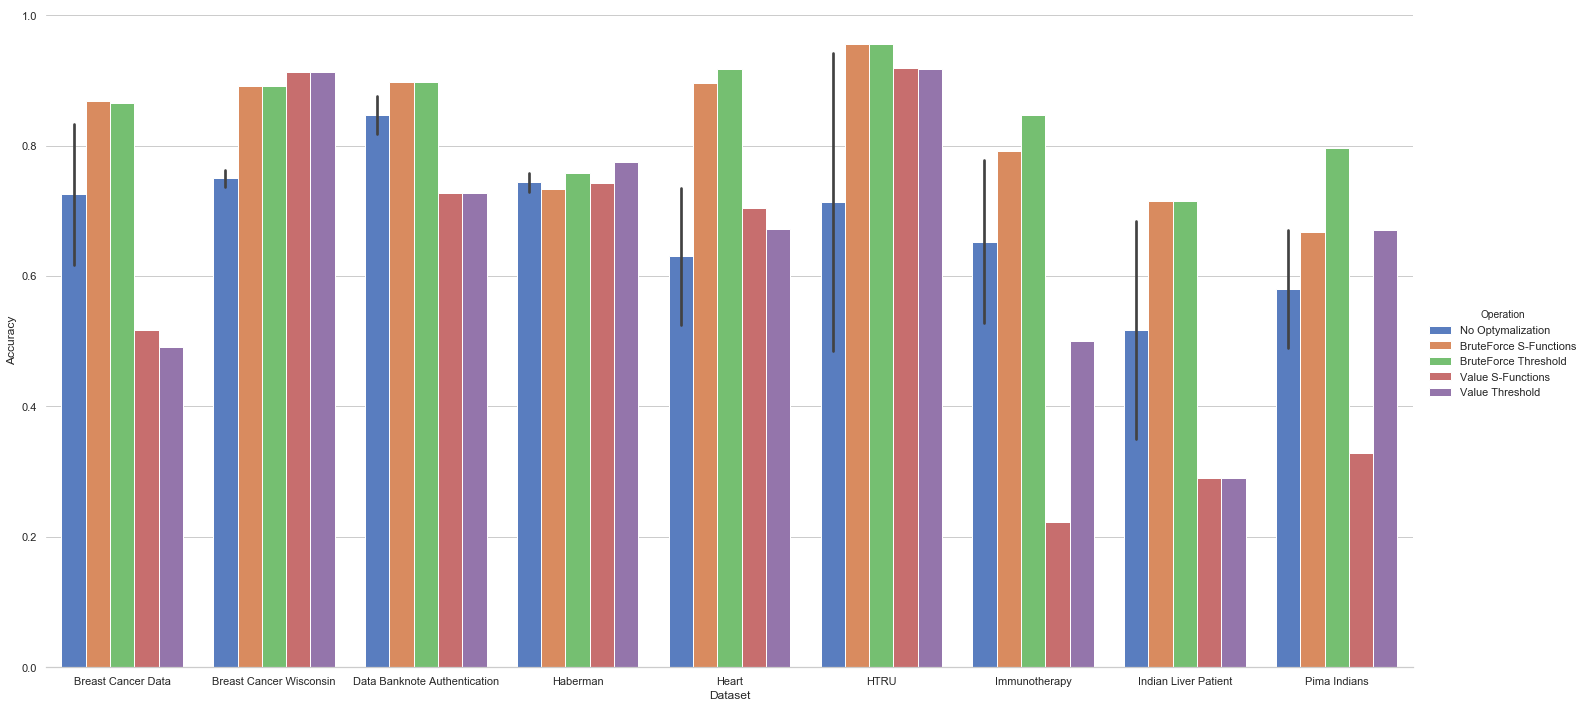

In [21]:
results = pd.concat([dataset_stats_breast, dataset_stats_wisconsin, dataset_stats_banknote, dataset_stats_haberman, dataset_stats_heart, dataset_stats_htru, dataset_stats_immunotherapy, dataset_stats_liver, dataset_stats_pima])

gausses_result = results.loc[(results.Gausses == 5)]
gausses_result["F-Score Average"] = (gausses_result["F-Score A"] + gausses_result["F-Score B"])/2
# !pip install -U seaborn
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# ax = sns.barplot(x="Gausses", y="Accuracy", data=adam)
%matplotlib inline
sns.set(style="whitegrid")
# fig, ax = plt.subplots(figsize=(20,8))
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Dataset", y="Accuracy", hue="Operation", data=gausses_result, kind="bar", palette="muted", height=10, aspect=2)
g.despine(left=True)
g.set_ylabels("Accuracy")


In [22]:
datasets = ["Breast Cancer Data", "Breast Cancer Wisconsin", "Data Banknote Authentication", "Haberman", "Heart", "HTRU", "Immunotherapy", "Indian Liver Patient", "Pima Indians"]

for dataset in datasets:
    df = pickle.load(open("Pickle/" + dataset + "/3 Gausses/train_features_df.p", "rb"))
    print("Train:\t{}: {}".format(dataset, round(df.Decision.value_counts().max() / df.Decision.count(), 3)))
    
for dataset in datasets:
    df = pickle.load(open("Pickle/" + dataset + "/3 Gausses/test_features_df.p", "rb"))
    print("Test:\t{}: {}".format(dataset, round(df.Decision.value_counts().max() / df.Decision.count(), 3)))

Train:	Breast Cancer Data: 0.626
Train:	Breast Cancer Wisconsin: 0.65
Train:	Data Banknote Authentication: 0.555
Train:	Haberman: 0.734
Train:	Heart: 0.545
Train:	HTRU: 0.908
Train:	Immunotherapy: 0.792
Train:	Indian Liver Patient: 0.715
Train:	Pima Indians: 0.668
Test:	Breast Cancer Data: 0.632
Test:	Breast Cancer Wisconsin: 0.65
Test:	Data Banknote Authentication: 0.556
Test:	Haberman: 0.742
Test:	Heart: 0.541
Test:	HTRU: 0.908
Test:	Immunotherapy: 0.778
Test:	Indian Liver Patient: 0.709
Test:	Pima Indians: 0.671
